<a href="https://colab.research.google.com/github/moizarsalan/Artificial-Neural-Network/blob/main/Lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Name: Abdul Moiz Arsalan**

### **Reg_No: B22F1086AI072**

### **Lab Instructor: Mam Ammara Irfan**

### **Course Instructor: Dr Arshad Iqbal**

## **Lab: 06**

### **Import libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import HeNormal, GlorotUniform, LecunNormal

### **Load the dataset**

Loads the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, split into 50,000 training and 10,000 test images. The images are normalized by dividing pixel values by 255.0 to scale them between 0 and 1, improving training stability.

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### **Function to create model**

Defines a function to create a simple ANN model with three hidden layers. The first layer flattens the input (since CIFAR-10 images are 32x32x3). Three dense layers follow, each using the specified weight initializer and ReLU activation for non-linearity. The final layer has 10 neurons (one per class) with a softmax activation for classification. The model is compiled using Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the evaluation metric.

In [3]:
def create_model(initializer):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu', kernel_initializer=initializer),
        Dense(256, activation='relu', kernel_initializer=initializer),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

### **Defining Initializers**

Defines three weight initializers: He Normal (best for ReLU), Xavier (Glorot) (works well with tanh and sigmoid), and Lecun Normal (best for sigmoid and softmax). These initializers help prevent issues like vanishing and exploding gradients, ensuring stable training.

In [4]:
initializers = {
    "He Normal": HeNormal(),
    "Xavier (Glorot)": GlorotUniform(),
    "Lecun Normal": LecunNormal()
}

### **Training the Initializers**

Trains a separate model for each initializer. For each initializer, it creates a model, trains it for 10 epochs using a batch size of 64, and validates it on the test set. The training history, including loss and accuracy for each epoch, is stored in a dictionary for later visualization.



In [5]:
history_dict = {}

for name, init in initializers.items():
    print(f"\nTraining with {name} initialization:")

    model = create_model(init)

    history = model.fit(x_train, y_train,
                        epochs=10,
                        validation_data=(x_test, y_test),
                        batch_size=64,
                        verbose=1)

    history_dict[name] = history.history


Training with He Normal initialization:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.2660 - loss: 2.0562 - val_accuracy: 0.3619 - val_loss: 1.7515
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.3778 - loss: 1.7208 - val_accuracy: 0.4146 - val_loss: 1.6481
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.4191 - loss: 1.6215 - val_accuracy: 0.4337 - val_loss: 1.5793
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.4473 - loss: 1.5434 - val_accuracy: 0.4246 - val_loss: 1.6028
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.4619 - loss: 1.4997 - val_accuracy: 0.4232 - val_loss: 1.6224
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.4783 - loss: 1.4648 - val_accuracy: 0.4550 - val_loss: 1.5276
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.4873 - loss: 1.4299 - val_accuracy: 0.4835 - val_loss: 1.4540
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.4996 - loss: 1.3935 - 

### **Visualize Results for Each Initializer**

Visualizes training and validation accuracy and loss for each initializer separately. Two subplots are generated: one for accuracy and another for loss. The trends in these plots show how well the model learns with different initializers over epochs.



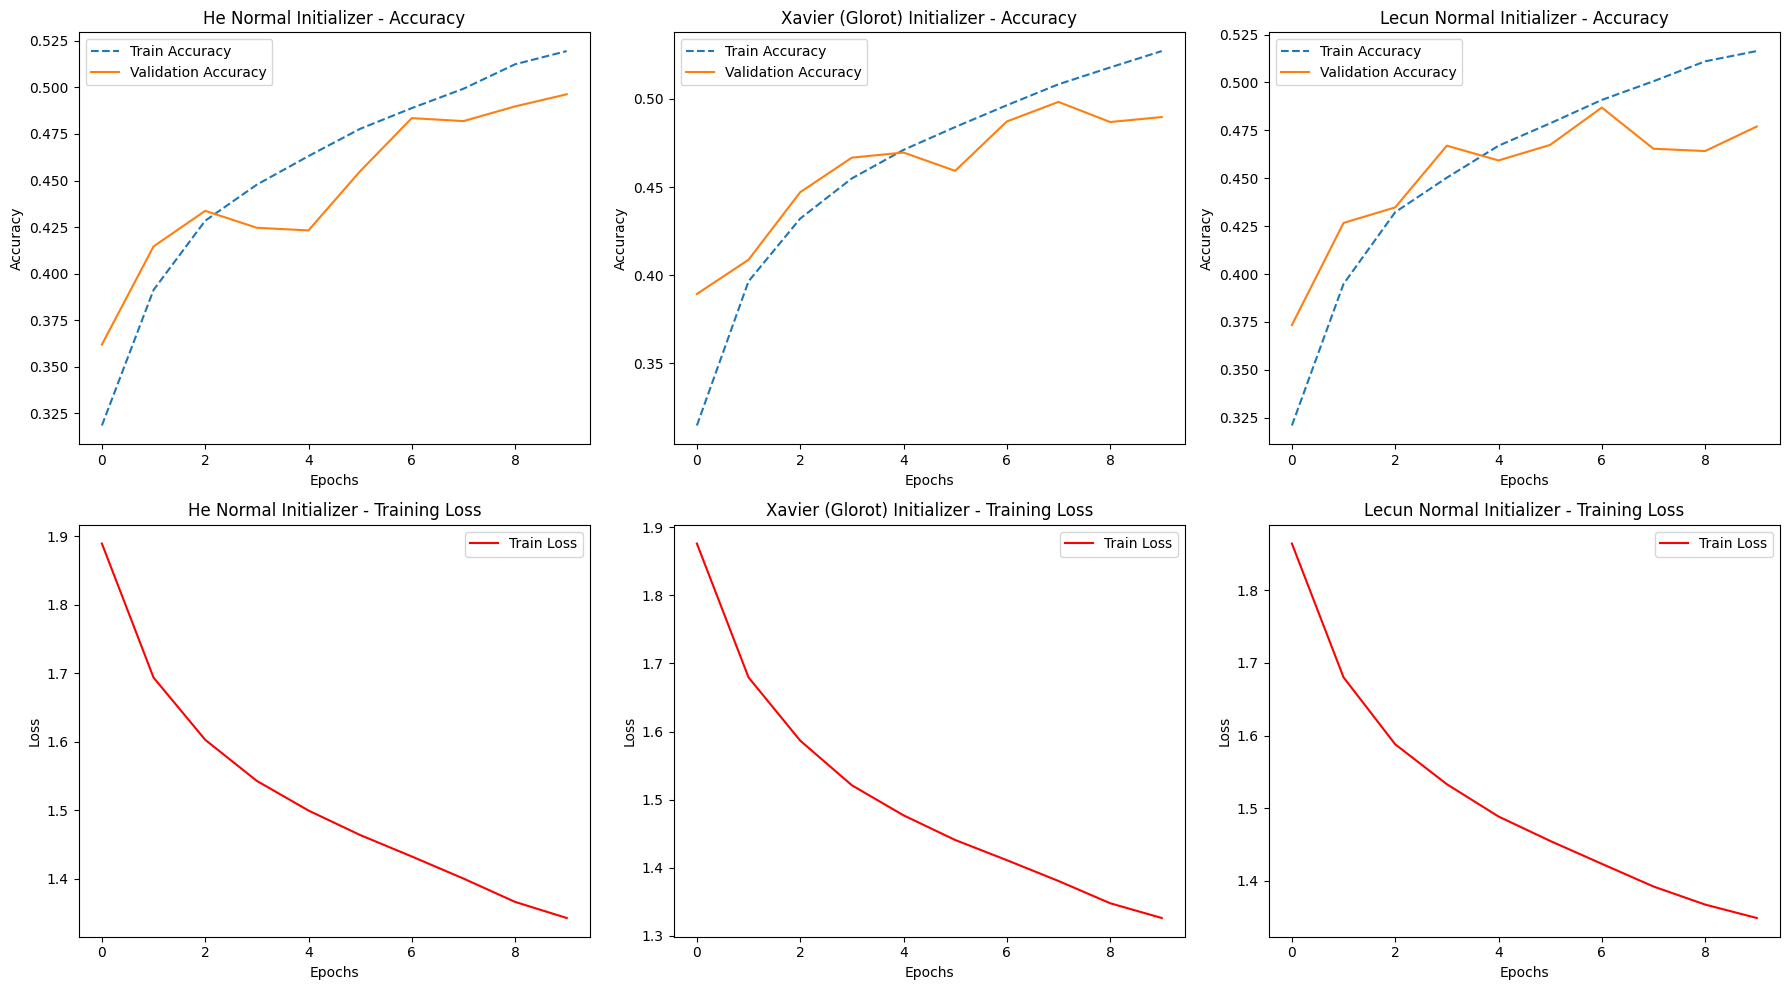

In [9]:
def plot_results(history_dict):
    plt.figure(figsize=(18, 10))  # Increase figure size for two rows

    # First row: Training & Validation Accuracy
    for i, (name, history) in enumerate(history_dict.items(), 1):
        plt.subplot(2, 3, i)  # Arrange in 2 rows, 3 columns
        plt.plot(history['accuracy'], label='Train Accuracy', linestyle='dashed')
        plt.plot(history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'{name} Initializer - Accuracy')
        plt.legend()

    # Second row: Training Loss
    for i, (name, history) in enumerate(history_dict.items(), 4):
        plt.subplot(2, 3, i)  # Continue in the second row
        plt.plot(history['loss'], label='Train Loss', color='red', linestyle='solid')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'{name} Initializer - Training Loss')
        plt.legend()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Call function to plot all initializers
plot_results(history_dict)


### **Compare All Initializers**

Compares the performance of all initializers by plotting validation accuracy and loss on the same graph. This allows direct comparison of how each initializer impacts model convergence and generalization. A higher validation accuracy and lower validation loss indicate a more effective initializer.

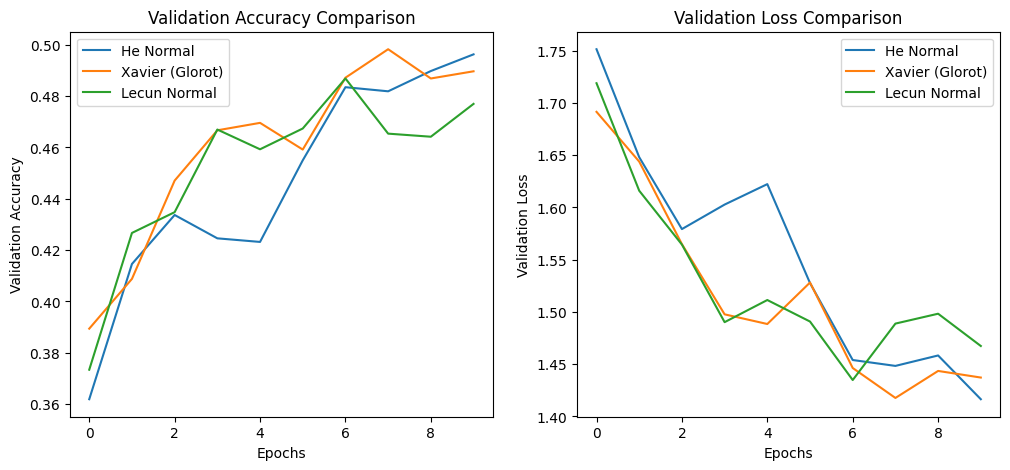

In [7]:
plt.figure(figsize=(12, 5))

# Compare validation accuracy
plt.subplot(1, 2, 1)
for name, history in history_dict.items():
    plt.plot(history['val_accuracy'], label=name)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy Comparison')

# Compare validation loss
plt.subplot(1, 2, 2)
for name, history in history_dict.items():
    plt.plot(history['val_loss'], label=name)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Loss Comparison')

plt.show()
